<a href="https://colab.research.google.com/github/amarabuco/seriestemporais/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 7.0 MB/s 
     |████████████████████████████████| 6.4 MB 11.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 5.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Imports

In [ ]:
import yfinance as yf

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
import matplotlib as mpl

In [ ]:
mpl.rcParams['figure.figsize'] = [10, 5]

# Dados: sustentabilidade 🌏  e finanças 💰

## CO2

In [ ]:
sm.datasets.co2.DESCRLONG

'\nAtmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.\n\nPeriod of Record: March 1958 - December 2001\n\nMethods: An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section.'

In [ ]:
co2 = sm.datasets.co2.data.load_pandas().data

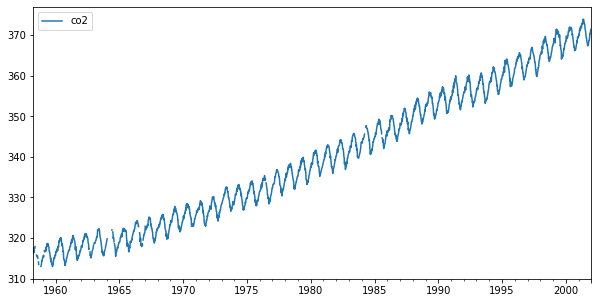

In [ ]:
co2.plot()

## EL NINO

In [ ]:
sm.datasets.elnino.DESCRLONG

'This data contains the averaged monthly sea surface\ntemperature in degrees Celcius of the Pacific Ocean, between 0-10 degrees South\nand 90-80 degrees West, from 1950 to 2010.  This dataset was obtained from\nNOAA.\n'

In [ ]:
elnino = sm.datasets.elnino.data.load_pandas().data

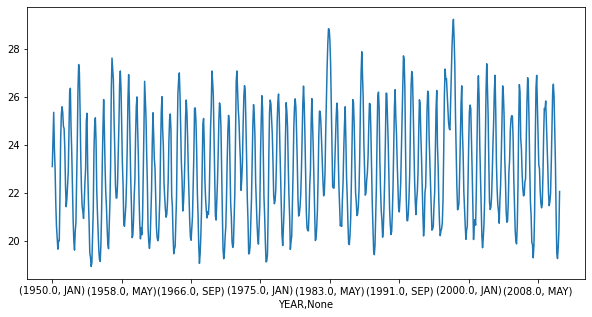

In [ ]:
elnino.set_index('YEAR').stack().plot()

In [ ]:
elnino = elnino.set_index('YEAR').stack()

In [ ]:
new_index = pd.date_range(start='1950-01-01', end='2010-12-31', freq='M')

In [ ]:
len(elnino.index)

732

In [ ]:
len(new_index)

732

In [ ]:
elnino.index = new_index
elnino = pd.DataFrame(elnino)
elnino.columns = ['elnino']
elnino

,elnino
1950-01-31,23.11
1950-02-28,24.20
1950-03-31,25.37
1950-04-30,23.86
1950-05-31,23.03
...,...
2010-08-31,19.49
2010-09-30,19.28
2010-10-31,19.73
2010-11-30,20.44


## SAMSUNG

### PRICES

In [ ]:
prices = yf.download("SMSN.IL", period='5y')

[*********************100%***********************]  1 of 1 completed


In [ ]:
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-11,910.0,911.5,908.00000,910.0,797.191956,26879
2017-04-12,920.0,924.0,910.26239,924.0,809.456482,15413
2017-04-13,935.5,939.0,931.50000,933.0,817.340698,8228
2017-04-18,909.0,909.5,900.50000,908.0,795.439941,15929
2017-04-19,898.0,908.0,893.50000,901.5,789.745789,13766


In [ ]:
prices['Adj Close'].head(10)

Date
2017-04-11    797.191956
2017-04-12    809.456482
2017-04-13    817.340698
2017-04-18    795.439941
2017-04-19    789.745789
2017-04-20    773.101074
2017-04-21    785.365479
2017-04-24    798.067932
2017-04-25    825.225159
2017-04-26    818.654846
Name: Adj Close, dtype: float64

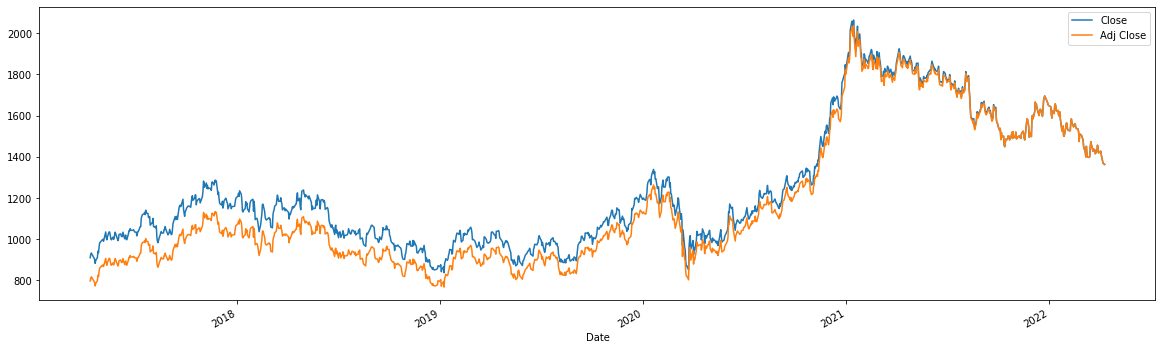

In [ ]:
prices[['Close', 'Adj Close']].plot(figsize=(20,6))

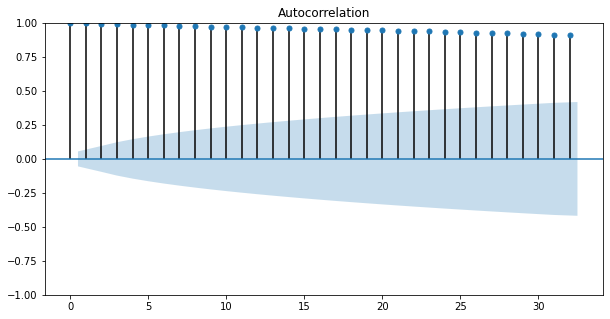

In [ ]:
plot_acf(prices['Adj Close']);

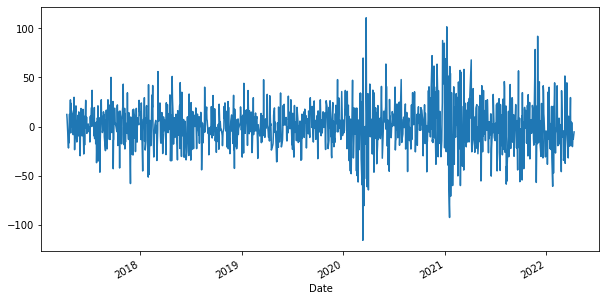

In [ ]:
prices['Adj Close'].diff().dropna().plot()

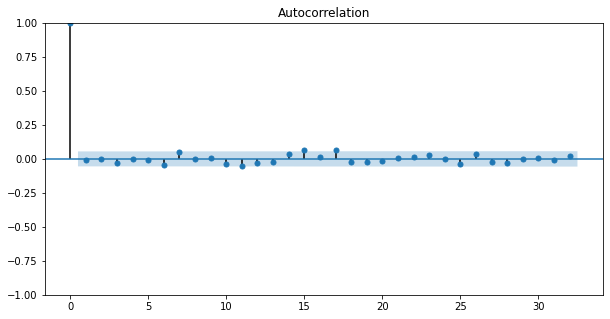

In [ ]:
plot_acf(prices['Adj Close'].diff().dropna());

**Será que modelos de machine learning poderiam descobrir relações e padrões não lineares, que os modelos clássicos lineares não conseguem?** 🤔:

### Revenues

In [ ]:
fin = pd.read_csv('https://raw.githubusercontent.com/amarabuco/seriestemporais/main/samsung_fin.csv', decimal=',', index_col=0).T.drop('Currency')

In [ ]:
index = pd.date_range(start='2013', end='2022', freq='Q')
index

DatetimeIndex(['2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [ ]:
fin['index'] = index[:-1]
fin.set_index('index', inplace=True)

In [ ]:
fin = fin.astype('float32')

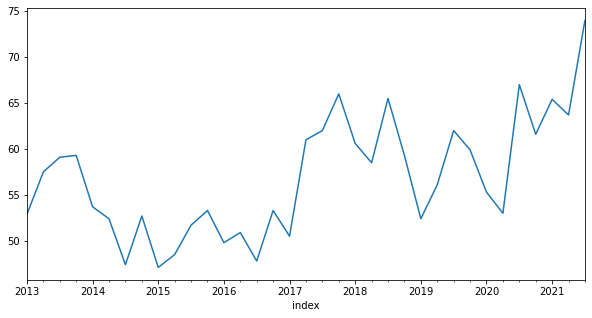

In [ ]:
fin['Revenue'].plot(figsize=(10,5))

# Show me the code 💻

# Séries Temporais

## CO2

### Análise

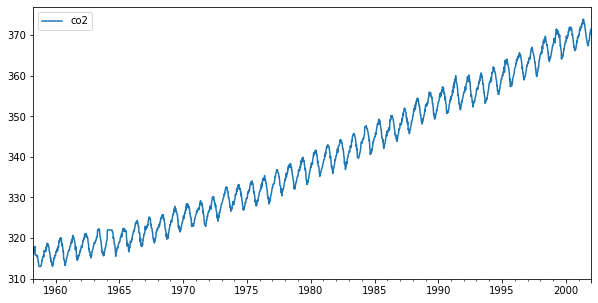

In [ ]:
co2.fillna(method='bfill').plot()

In [ ]:
co2.fillna(method='bfill', inplace=True)

In [ ]:
co2_decomp = tsa.seasonal_decompose(co2, period=1)

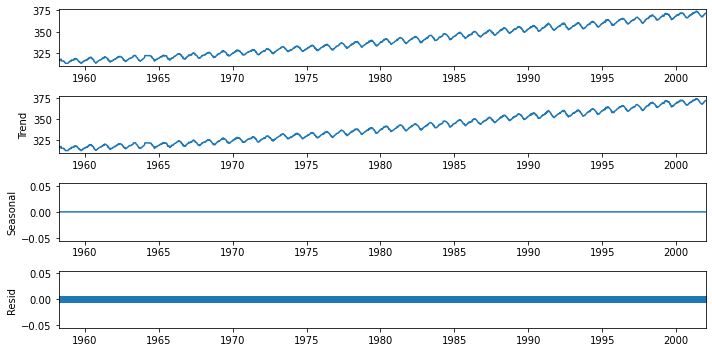

In [ ]:
co2_decomp.plot();

#### Stationarity

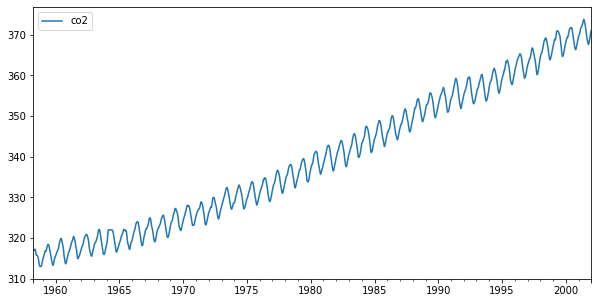

In [ ]:
co2.rolling(5).mean().plot()

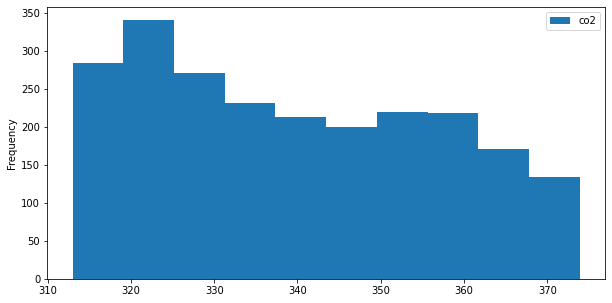

In [ ]:
co2.plot.hist()

#### Diferentiation 1st order (d)

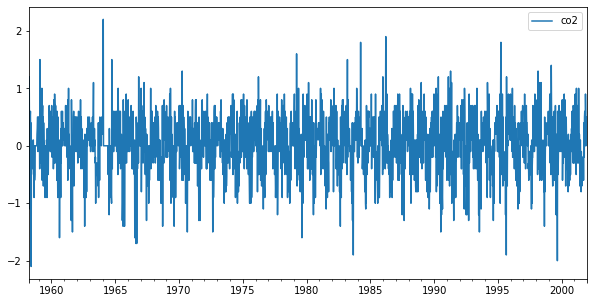

In [ ]:
co2.diff().plot()

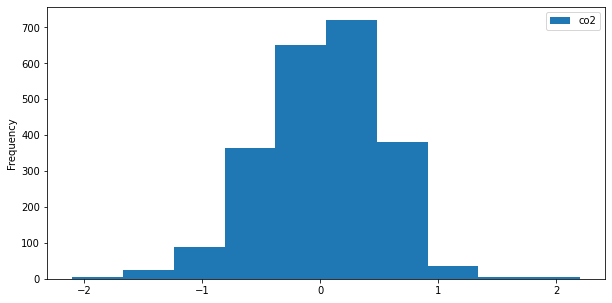

In [ ]:
co2.diff().plot.hist()

In [ ]:
co2d1 = co2.diff().dropna()

#### Autocorrelation

A correlation of a variable with itself at different times
is known as autocorrelation or serial correlation.

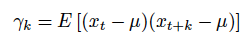

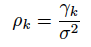

In [ ]:
co2.shift(-1)

,co2
1958-03-29,317.3
1958-04-05,317.6
1958-04-12,317.5
1958-04-19,316.4
1958-04-26,316.9
...,...
2001-12-01,370.8
2001-12-08,371.2
2001-12-15,371.3
2001-12-22,371.5


In [ ]:
co2.corrwith(co2.shift(-1))

co2    0.999579
dtype: float64

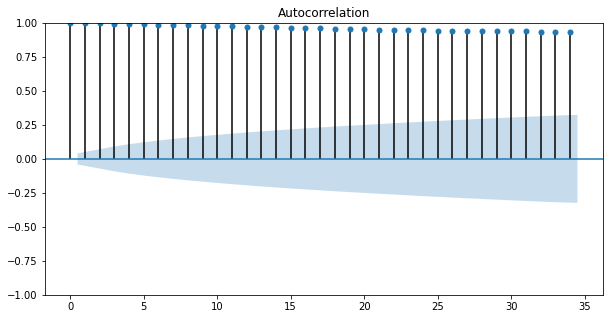

In [ ]:
plot_acf(co2);

In [ ]:
co2d1.corrwith(co2d1.shift(-1))

co2    0.080625
dtype: float64

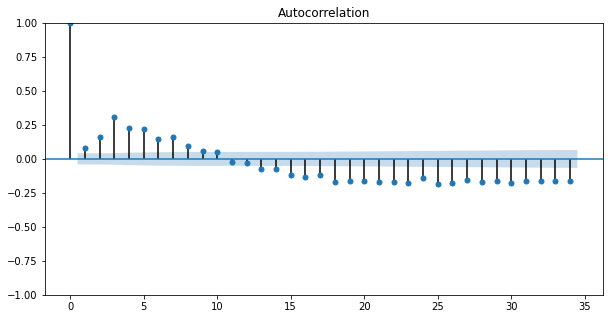

In [ ]:
plot_acf(co2d1);

#### Partial Correlation

The partial autocorrelation at lag k is the correlation that
results after removing the effect of any correlations due to the terms at shorter
lags.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


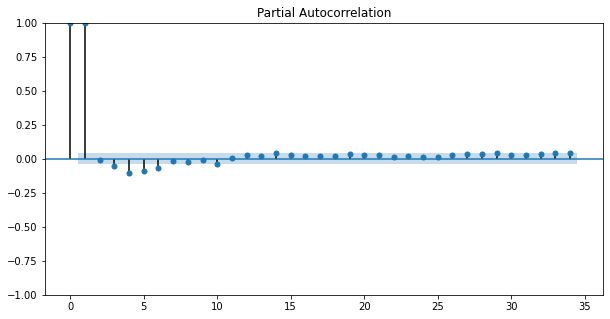

In [ ]:
plot_pacf(co2);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


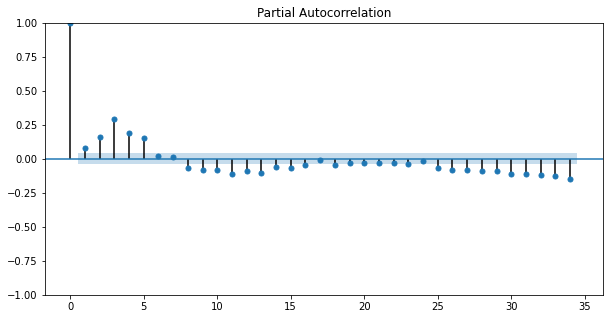

In [ ]:
plot_pacf(co2d1);

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

### Feature Engineering

In [ ]:
#time travel
def get_lags(series, lags):
  result = []
  if lags > 0:
    for lag in range(1, lags+1):
    #  print(lag)
    #  print(series.shift(lag))
      result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'-'+str(lag)}, axis=1))
    #return result
    return pd.concat(result, axis=1, names=list(range(-1,-lags))).dropna()
  else:
    for lag in range(-1, lags-1,-1):
      #print(lag)
      #print(series.shift(lag))
      result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'+'+str(abs(lag))}, axis=1))
    #return result
    return pd.concat(result, axis=1, names=list(range(+1,-lags))).dropna()

In [ ]:
get_lags(co2, 3)

,co2-1,co2-2,co2-3
1958-04-19,317.6,317.3,316.1
1958-04-26,317.5,317.6,317.3
1958-05-03,316.4,317.5,317.6
1958-05-10,316.9,316.4,317.5
1958-05-17,317.5,316.9,316.4
...,...,...,...
2001-12-01,370.3,369.7,368.8
2001-12-08,370.3,370.3,369.7
2001-12-15,370.8,370.3,370.3
2001-12-22,371.2,370.8,370.3


In [ ]:
X = get_lags(co2, 5)

In [ ]:
X.head()

,co2-1,co2-2,co2-3,co2-4,co2-5
1958-05-03,316.4,317.5,317.6,317.3,316.1
1958-05-10,316.9,316.4,317.5,317.6,317.3
1958-05-17,317.5,316.9,316.4,317.5,317.6
1958-05-24,317.5,317.5,316.9,316.4,317.5
1958-05-31,317.9,317.5,317.5,316.9,316.4


In [ ]:
y = co2.reindex(X.index)

In [ ]:
y.head()

,co2
1958-05-03,316.9
1958-05-10,317.5
1958-05-17,317.5
1958-05-24,317.9
1958-05-31,315.8


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1823, 5)
(1823, 1)
(456, 5)
(456, 1)


In [ ]:
y_test

,co2
1993-04-10,358.8
1993-04-17,359.4
1993-04-24,360.0
1993-05-01,359.6
1993-05-08,359.7
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [ ]:
X = get_lags(co2, 5)
y = co2.reindex(X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1823, 5)
(1823, 1)
(456, 5)
(456, 1)


### KNN

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_nca_illustration_001.png)

![KNN](https://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

Hyperparameters:

* K 
* weights
* distance

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [ ]:
neigh.predict(X_test)[:10]

array([[359.1450552 ],
       [359.18236965],
       [359.61567621],
       [358.8202041 ],
       [358.96167452],
       [359.13986417],
       [359.31448896],
       [359.66453356],
       [359.04143323],
       [358.54522638]])

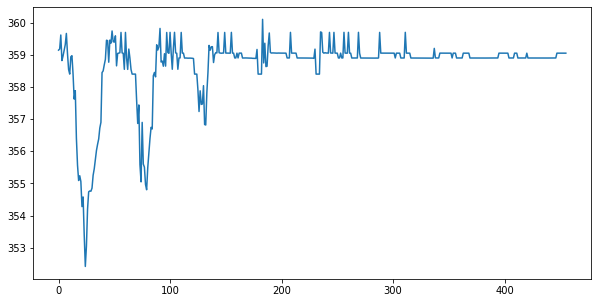

In [ ]:
pd.Series(neigh.predict(X_test).flatten()).plot()

In [ ]:
resultsco2 = {}

In [ ]:
print('CO2 - KNN model Results')
print(r2_score(neigh.predict(X_test), y_test))
print(mean_squared_error(neigh.predict(X_test), y_test))
print(mean_absolute_error(neigh.predict(X_test), y_test))
resultsco2['KNN'] = {'r2':r2_score(neigh.predict(X_test), y_test), \
                 'mse': mean_squared_error(neigh.predict(X_test), y_test), 
                 'mae': mean_absolute_error(neigh.predict(X_test), y_test)}


CO2 - KNN model Results
-45.318269916857126
52.55534050517824
5.84786500666511


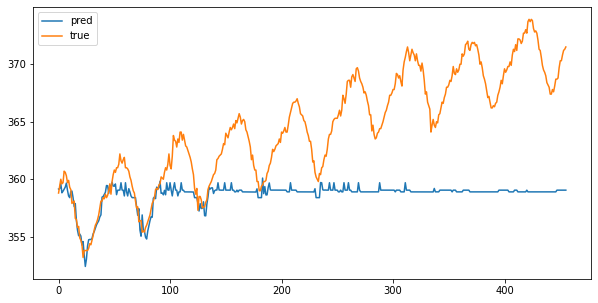

In [ ]:
fig, ax = plt.subplots()
ax.plot(neigh.predict(X_test).flatten(), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.legend()

E agora?

In [ ]:
X_train_d1 = X_train.diff().dropna()
X_test_d1 = X_test.diff().dropna()
y_train_d1 = y_train.diff().dropna()
y_test_d1 = y_test.diff().dropna()

In [ ]:
neighd1 = KNeighborsRegressor(n_neighbors=2, weights='distance')
neighd1.fit(X_train_d1, y_train_d1)

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [ ]:
print('CO2 d1 - KNN model Results')
print(r2_score(neighd1.predict(X_test_d1), y_test_d1))
print(mean_squared_error(neighd1.predict(X_test_d1), y_test_d1))
print(mean_absolute_error(neighd1.predict(X_test_d1), y_test_d1))
resultsco2['KNN D1'] = {'r2':r2_score(neigh.predict(X_test), y_test), \
                 'mse': mean_squared_error(neigh.predict(X_test), y_test), 
                 'mae': mean_absolute_error(neigh.predict(X_test), y_test)}


CO2 d1 - KNN model Results
-0.667191795041667
0.27544045204658635
0.4149000652599901


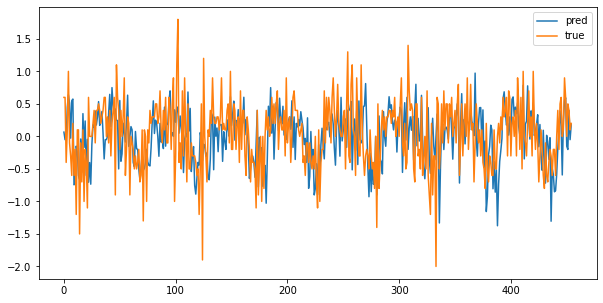

In [ ]:
fig, ax = plt.subplots()
ax.plot(pd.Series(neighd1.predict(X_test_d1).flatten()), label='pred')
ax.plot(y_test_d1.reset_index(drop=True), label='true')
plt.legend()

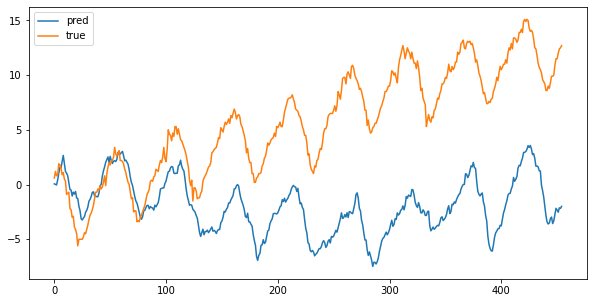

In [ ]:
fig, ax = plt.subplots()
ax.plot(pd.Series(neighd1.predict(X_test_d1).flatten()).cumsum(), label='pred')
ax.plot(y_test_d1.reset_index(drop=True).cumsum(), label='true')
plt.legend()

Qual o problema dessa previsão?

 * Erro acumulado (problema em multi step recursivo)

In [ ]:
pred_one = y_test.shift(1).reset_index(drop=True).add(pd.Series(neighd1.predict(X_test_d1).flatten(), name='co2'),axis=0)

In [ ]:
pred_one

,co2
0,NaN
1,358.750000
2,359.350000
3,360.450000
4,360.240213
...,...
451,370.098387
452,370.700000
453,370.750000
454,371.382843


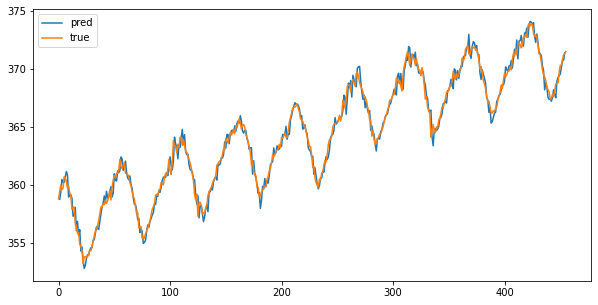

In [ ]:
fig, ax = plt.subplots()
ax.plot(pred_one, label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.legend()

In [ ]:
pred_one

,co2
0,NaN
1,358.750000
2,359.350000
3,360.450000
4,360.240213
...,...
451,370.098387
452,370.700000
453,370.750000
454,371.382843


In [ ]:
print('CO2 pred_one - KNN model Results')
print(r2_score(pred_one.iloc[1:-1], y_test.iloc[1:-1]))
print(mean_squared_error(pred_one.iloc[1:-1], y_test.iloc[1:-1]))
print(mean_absolute_error(pred_one.iloc[1:-1], y_test.iloc[1:-1]))
resultsco2['KNN D1 ONE'] = {'r2':r2_score(pred_one.iloc[1:-1], y_test.iloc[1:-1]), \
                 'mse': mean_squared_error(pred_one.iloc[1:-1], y_test.iloc[1:-1]), 
                 'mae': mean_absolute_error(pred_one.iloc[1:-1], y_test.iloc[1:-1])}


CO2 pred_one - KNN model Results
0.9854018352651794
0.3534815531051545
0.4554406614822524


In [ ]:
residuos = neighd1.predict(X_test_d1).flatten() - y_test_d1.reset_index(drop=True).values.flatten()

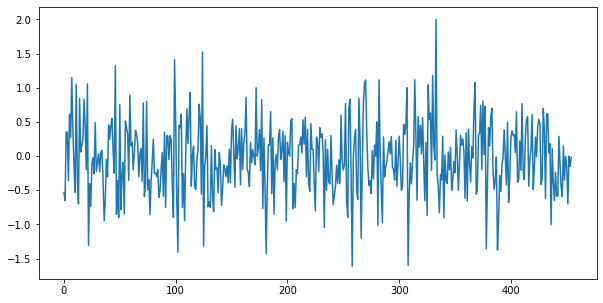

In [ ]:
pd.Series(residuos).plot()

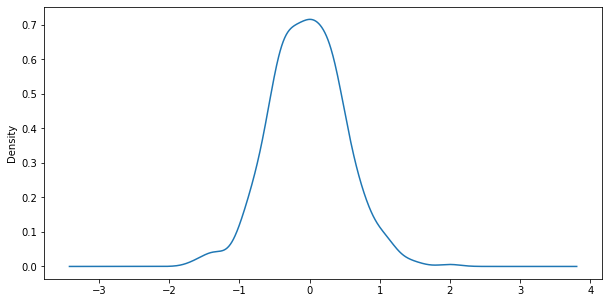

In [ ]:
pd.Series(residuos).plot.kde()

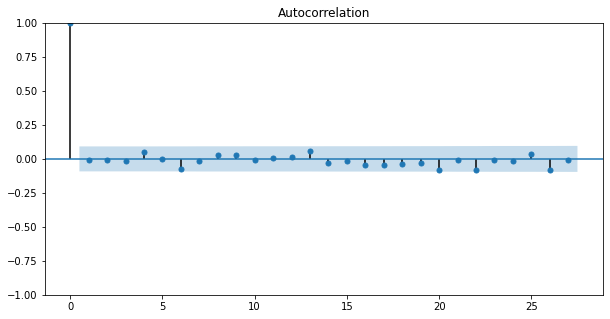

In [ ]:
plot_acf(residuos);

## EL NINO

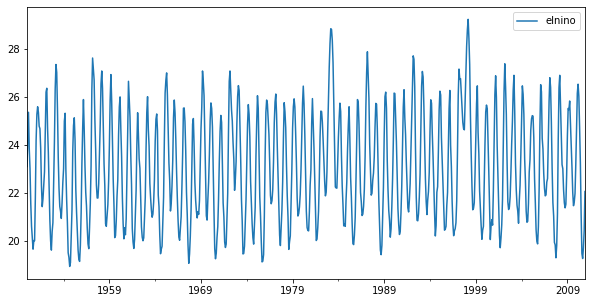

In [ ]:
elnino.plot()

In [ ]:
elnino_decomp = tsa.seasonal_decompose(elnino.values, period=12)

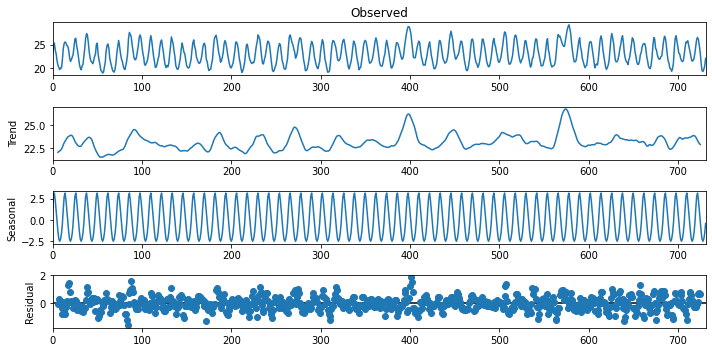

In [ ]:
elnino_decomp.plot();

### Stationarity

ok, no diff is necessary.

### ACF

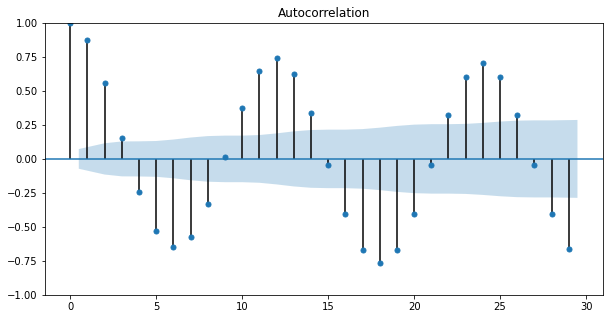

In [ ]:
plot_acf(elnino);

### PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


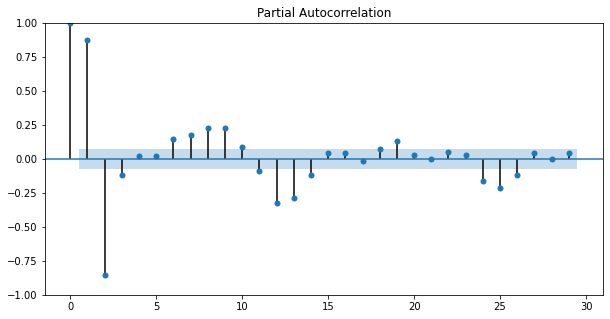

In [ ]:
plot_pacf(elnino);

### KNN

In [ ]:
X = get_lags(elnino, 12)
y = elnino.reindex(X.index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 12)
(576, 1)
(144, 12)
(144, 1)


In [ ]:
neighel = KNeighborsRegressor(n_neighbors=2, weights='uniform')
neighel.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
results = {}

In [ ]:
print('El Nino - KNN model Results')
print(r2_score(neighel.predict(X_test), y_test))
print(mean_squared_error(neighel.predict(X_test), y_test))
print(mean_absolute_error(neighel.predict(X_test), y_test))
results['KNN'] = {'r2':r2_score(neighel.predict(X_test), y_test), \
                 'mse': mean_squared_error(neighel.predict(X_test), y_test), 
                 'mae': mean_absolute_error(neighel.predict(X_test), y_test)}

El Nino - KNN model Results
0.8718755174466433
0.5373526041666667
0.6042708333333334


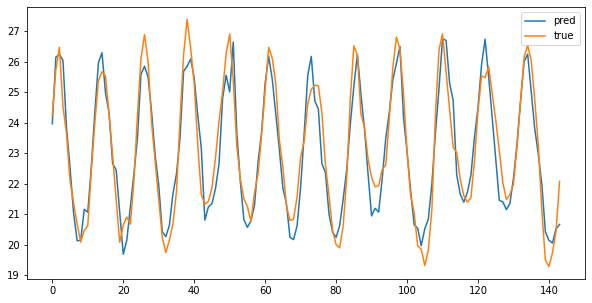

In [ ]:
fig, ax = plt.subplots()
ax.plot(pd.Series(neighel.predict(X_test).flatten()), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.legend()

### SVR

In [ ]:
from sklearn.svm import SVR

![SVC](https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png)

![SVR](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_regression_001.png)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR

In [ ]:
regr = SVR(C=1.0, epsilon=0.2, kernel='linear')

In [ ]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=0.2, kernel='linear')

In [ ]:
print('El Nino - SVR model Results')
print(r2_score(regr.predict(X_test), y_test))
print(mean_squared_error(regr.predict(X_test), y_test))
print(mean_absolute_error(regr.predict(X_test), y_test))
results['SVR'] = {'r2':r2_score(regr.predict(X_test), y_test), \
                 'mse': mean_squared_error(regr.predict(X_test), y_test), 
                 'mae': mean_absolute_error(regr.predict(X_test), y_test)}

El Nino - SVR model Results
0.9390156865481243
0.2853514404147506
0.42605402653850893


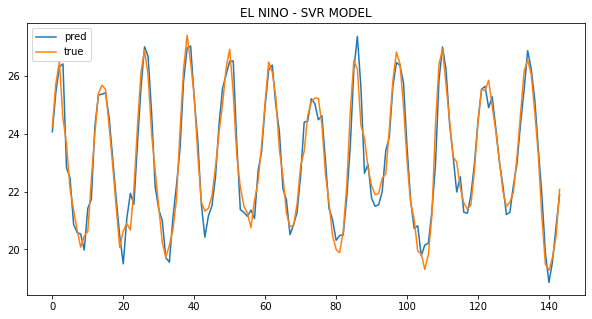

In [ ]:
fig, ax = plt.subplots()
ax.plot(regr.predict(X_test), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('EL NINO - SVR MODEL')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
parameters = {'kernel':['linear','rbf'], 'C':[0.1,1,10]}

In [ ]:
for p in parameters.items():
  print(p)

('kernel', ['linear', 'rbf'])
('C', [0.1, 1, 10])


In [ ]:
regr2 = SVR()

In [ ]:
regrGS = GridSearchCV(regr2, parameters, cv=TimeSeriesSplit())

In [ ]:
%%time
res = regrGS.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

CPU times: user 2.22 s, sys: 5.6 ms, total: 2.23 s
Wall time: 2.23 s


In [ ]:
print(res.best_score_)
print(res.best_params_)

0.9493115326753226
{'C': 0.1, 'kernel': 'linear'}


In [ ]:
print('SVR GS - model Results')
print('r2' , r2_score(res.predict(X_test), y_test))
print('mse' ,mean_squared_error(res.predict(X_test), y_test))
print('mae', mean_absolute_error(res.predict(X_test), y_test))
results['SVRGS'] = {'r2':r2_score(res.predict(X_test), y_test), \
                 'mse': mean_squared_error(res.predict(X_test), y_test), 
                 'mae': mean_absolute_error(res.predict(X_test), y_test)}

SVR GS - model Results
r2 0.939110539237373
mse 0.2810941379427592
mae 0.4193266895650017


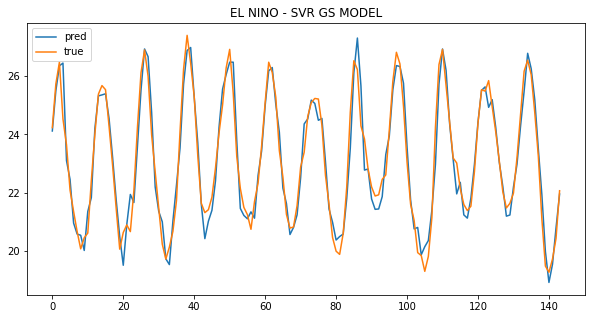

In [ ]:
fig, ax = plt.subplots()
ax.plot(res.predict(X_test), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('EL NINO - SVR GS MODEL')
plt.legend()

In [ ]:
pd.DataFrame(results)

,KNN,SVR,SVRGS
r2,0.871876,0.939016,0.939111
mse,0.537353,0.285351,0.281094
mae,0.604271,0.426054,0.419327


In [ ]:
X = get_lags(co2, 5)
y = co2.reindex(X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.2)

In [ ]:
regrco2 = SVR(kernel='linear')
regrco2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
print('SVR GS - model Results')
print('r2' , r2_score(regrco2.predict(X_test), y_test))
print('mse' ,mean_squared_error(regrco2.predict(X_test), y_test))
print('mae', mean_absolute_error(regrco2.predict(X_test), y_test))
resultsco2['SVRGS'] = {'r2':r2_score(regrco2.predict(X_test), y_test), \
                 'mse': mean_squared_error(regrco2.predict(X_test), y_test), 
                 'mae': mean_absolute_error(regrco2.predict(X_test), y_test)}


SVR GS - model Results
r2 0.9901566847904703
mse 0.23719501168606366
mae 0.37552955540609895


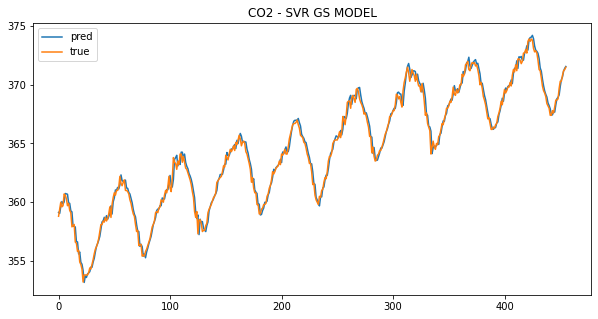

In [ ]:
fig, ax = plt.subplots()
ax.plot(regrco2.predict(X_test), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('CO2 - SVR GS MODEL')
plt.legend()

In [ ]:
pd.DataFrame(resultsco2)

,KNN,KNN D1,KNN D1 ONE,SVRGS
r2,-45.318270,-45.318270,0.985402,0.990157
mse,52.555341,52.555341,0.353482,0.237195
mae,5.847865,5.847865,0.455441,0.375530


Overfitting ?

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

In [ ]:
len(y)

2279

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    SVR(kernel='linear'), X, y, train_sizes=[50,100,150,200,250,300,350,384], cv=TimeSeriesSplit())
    #SVR(kernel='linear'), X, y, train_sizes=[np.round(np.array(list(range(0.1,1,0.1))) * len(y))], cv=TimeSeriesSplit())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

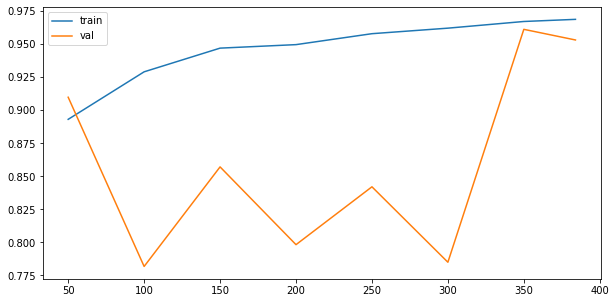

In [ ]:
pd.Series(train_scores.mean(axis=1), index=train_sizes).plot(label='train')
pd.Series(valid_scores.mean(axis=1), index=train_sizes).plot(label='val')
plt.legend()

# Show me the money 🤑

## Prices

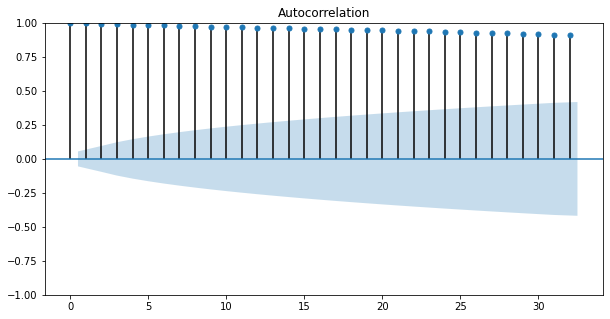

In [ ]:
plot_acf(prices['Adj Close']);

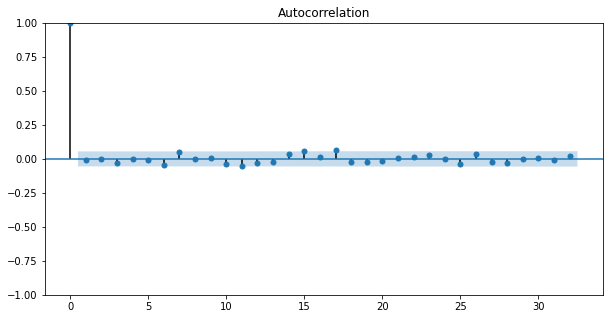

In [ ]:
plot_acf(prices['Adj Close'].diff().fillna(0));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


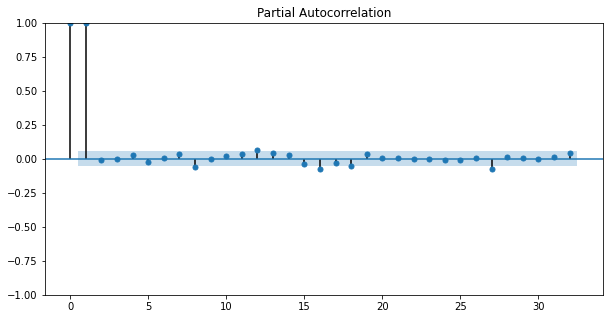

In [ ]:
plot_pacf(prices['Adj Close']);

### FE

In [ ]:
X = get_lags(pd.DataFrame(prices['Adj Close']), 7)
y = prices['Adj Close'].reindex(X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1006, 7)
(1006,)
(252, 7)
(252,)


In [ ]:
resultsprices = {}

## KNN

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

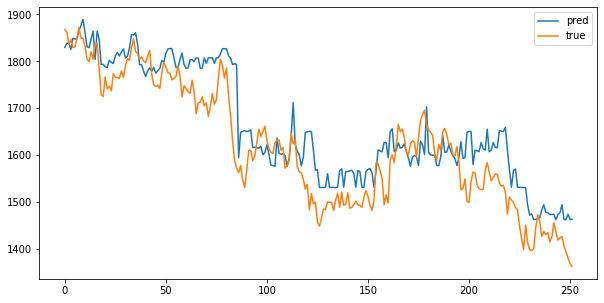

In [ ]:
pd.Series(y_pred).plot(label='pred')
y_test.reset_index(drop=True).plot(label='true')
plt.legend()

In [ ]:
print('Prices - KNN model Results')
print('r2' ,r2_score(neigh.predict(X_test), y_test))
print('mse' ,mean_squared_error(neigh.predict(X_test), y_test))
print('mae', mean_absolute_error(neigh.predict(X_test), y_test))
resultsprices['KNN'] = {'r2':r2_score(neigh.predict(X_test), y_test), \
                 'mse': mean_squared_error(neigh.predict(X_test), y_test), 
                 'mae': mean_absolute_error(neigh.predict(X_test), y_test)}

Prices - KNN model Results
r2 0.7096013960119982
mse 4210.650043299322
mae 52.80703192035267


In [ ]:
X_train_d1 = X_train.diff().dropna()
X_test_d1 = X_test.diff().dropna()
y_train_d1 = y_train.diff().dropna()
y_test_d1 = y_test.diff().dropna()

In [ ]:
neighd1 = KNeighborsRegressor(n_neighbors=2, weights='distance')
neighd1.fit(X_train_d1, y_train_d1)
y_pred_d1 = neighd1.predict(X_test_d1)

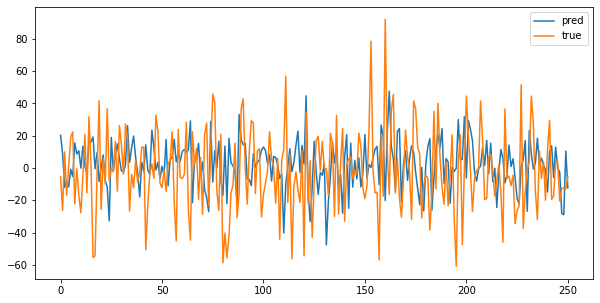

In [ ]:
pd.Series(y_pred_d1).plot(label='pred')
y_test_d1.reset_index(drop=True).plot(label='true')
plt.legend()

In [ ]:
pred_one = y_test.shift(1).reset_index(drop=True).add(pd.Series(neighd1.predict(X_test_d1).flatten(), name='prices'),axis=0)

In [ ]:
print('Prices pred_one - KNN model Results')
print(r2_score(pred_one.iloc[1:-1], y_test.iloc[1:-1]))
print(mean_squared_error(pred_one.iloc[1:-1], y_test.iloc[1:-1]))
print(mean_absolute_error(pred_one.iloc[1:-1], y_test.iloc[1:-1]))
resultsprices['KNN D1 ONE'] = {'r2':r2_score(pred_one.iloc[1:-1], y_test.iloc[1:-1]), \
                 'mse': mean_squared_error(pred_one.iloc[1:-1], y_test.iloc[1:-1]), 
                 'mae': mean_absolute_error(pred_one.iloc[1:-1], y_test.iloc[1:-1])}


Prices pred_one - KNN model Results
0.9495759221725417
854.7551648676425
22.534678606044853


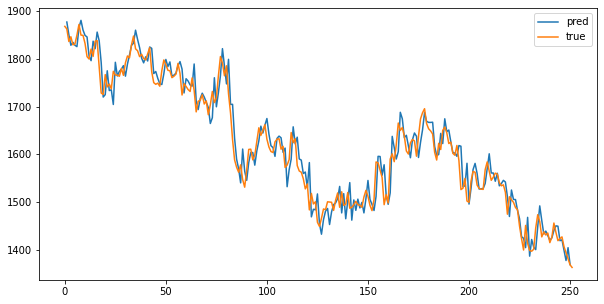

In [ ]:
fig, ax = plt.subplots()
ax.plot(pred_one, label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.legend()

## SVR

In [ ]:
regr = SVR(C=1.0, epsilon=0.2, kernel='linear')

In [ ]:
regr.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [ ]:
y_pred = regr.predict(X_test)

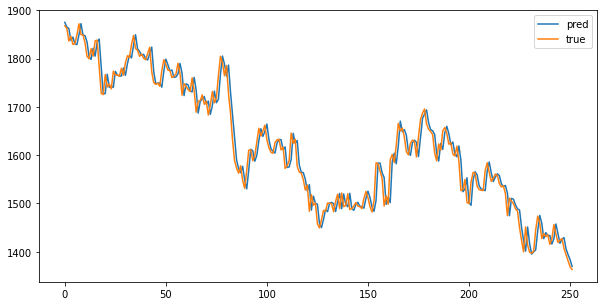

In [ ]:
pd.Series(y_pred).plot(label='pred')
y_test.reset_index(drop=True).plot(label='true')
plt.legend()

In [ ]:
print('Prices - SVR model Results')
print('r2' ,r2_score(y_pred, y_test))
print('mse' ,mean_squared_error(y_pred, y_test))
print('mae', mean_absolute_error(y_pred, y_test))
resultsprices['SVR'] = {'r2':r2_score(y_pred, y_test), \
                 'mse': mean_squared_error(y_pred, y_test), 
                 'mae': mean_absolute_error(y_pred, y_test)}

Prices - SVR model Results
r2 0.963271964236085
mse 613.071918661295
mae 19.234203976836564


Fiquei rico? 

Negociar ações é mais complicado do que fazer previsão de um passo a frente. 

O retorno geralmente ocorre a longo prazo, por isso um dos desafios é prever vários passos a frente.

In [ ]:
X_train

,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4,Adj Close-5,Adj Close-6,Adj Close-7
Date,,,,,,,
2017-04-24,785.365479,773.101074,789.745789,795.439941,817.340698,809.456482,797.191956
2017-04-25,798.067932,785.365479,773.101074,789.745789,795.439941,817.340698,809.456482
2017-04-26,825.225159,798.067932,785.365479,773.101074,789.745789,795.439941,817.340698
2017-04-27,818.654846,825.225159,798.067932,785.365479,773.101074,789.745789,795.439941
2017-04-28,842.307800,818.654846,825.225159,798.067932,785.365479,773.101074,789.745789
...,...,...,...,...,...,...,...
2021-04-08,1892.730225,1907.099121,1839.218506,1807.507812,1799.580200,1770.895752,1786.681030
2021-04-09,1866.965332,1892.730225,1907.099121,1839.218506,1807.507812,1799.580200,1770.895752
2021-04-12,1845.164185,1866.965332,1892.730225,1907.099121,1839.218506,1807.507812,1799.580200


In [ ]:
get_lags(pd.DataFrame(prices['Adj Close']), -7)

,Adj Close+1,Adj Close+2,Adj Close+3,Adj Close+4,Adj Close+5,Adj Close+6,Adj Close+7
Date,,,,,,,
2017-04-11,809.456482,817.340698,795.439941,789.745789,773.101074,785.365479,798.067932
2017-04-12,817.340698,795.439941,789.745789,773.101074,785.365479,798.067932,825.225159
2017-04-13,795.439941,789.745789,773.101074,785.365479,798.067932,825.225159,818.654846
2017-04-18,789.745789,773.101074,785.365479,798.067932,825.225159,818.654846,842.307800
2017-04-19,773.101074,785.365479,798.067932,825.225159,818.654846,842.307800,859.390503
...,...,...,...,...,...,...,...
2022-03-25,1426.500000,1456.000000,1436.500000,1419.000000,1423.500000,1427.000000,1406.500000
2022-03-28,1456.000000,1436.500000,1419.000000,1423.500000,1427.000000,1406.500000,1394.000000
2022-03-29,1436.500000,1419.000000,1423.500000,1427.000000,1406.500000,1394.000000,1381.500000


In [ ]:
y_train_multi = get_lags(pd.DataFrame(y_train), -7)
y_test_multi = get_lags(pd.DataFrame(y_test), -7)

In [ ]:
X_train_multi, y_train_multi = X_train.align(y_train_multi, join='inner', axis=0) 
X_test_multi, y_test_multi = X_test.align(y_test_multi, join='inner', axis=0) 

In [ ]:
X_train_multi.index is y_train_multi.index

True

In [ ]:
X_test_multi.index is y_test_multi.index

True

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
regr_multi = MultiOutputRegressor(LinearSVR(C=1.0, epsilon=0.2))

In [ ]:
regr_multi.fit(X_train_multi, y_train_multi)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

MultiOutputRegressor(estimator=LinearSVR(epsilon=0.2))

In [ ]:
y_pred_multi = regr_multi.predict(X_test_multi)

In [ ]:
regr_multi.predict(X_test_multi).shape

(245, 7)

In [ ]:
print('Prices - SVR multi model Results')
print('r2' ,r2_score(y_pred_multi, y_test_multi))
print('mse' ,mean_squared_error(y_pred_multi, y_test_multi))
print('mae', mean_absolute_error(y_pred_multi, y_test_multi))
resultsprices['SVR multi'] = {'r2':r2_score(y_pred_multi, y_test_multi), \
                 'mse': mean_squared_error(y_pred_multi, y_test_multi), 
                 'mae': mean_absolute_error(y_pred_multi, y_test_multi)}

Prices - SVR multi model Results
r2 0.3627946541123513
mse 9065.061796620957
mae 77.19764370745118


In [ ]:
  np.random.randint(1,100,5)

array([17, 40, 65, 34, 22])

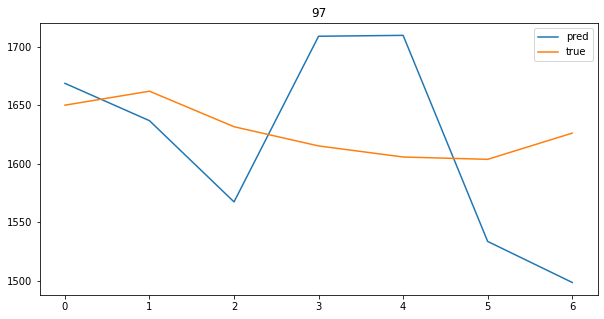

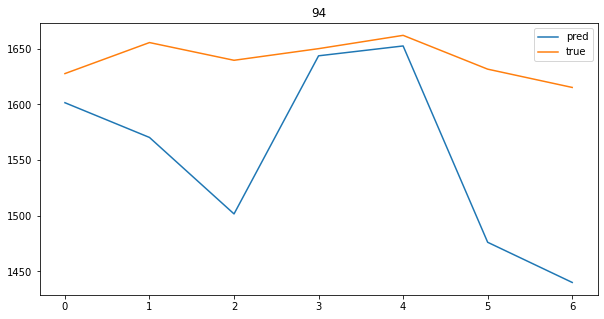

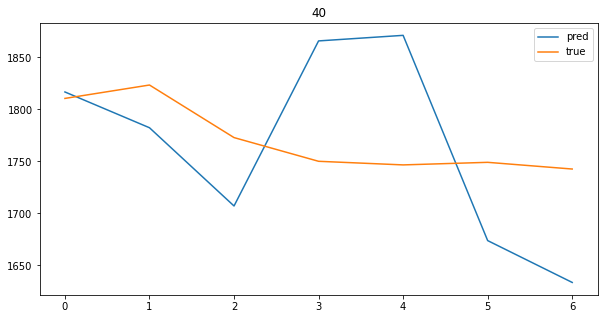

In [ ]:
for day in np.random.randint(1,100,3):
  fig, ax = plt.subplots()
  pd.Series(y_pred_multi[day]).plot(label='pred')
  pd.Series(pd.DataFrame(y_test_multi).reset_index(drop=True).loc[day].values).plot(label='true')
  plt.title(day)
  plt.legend()

In [ ]:
pd.DataFrame(resultsprices)

,KNN,KNN D1 ONE,SVR,SVR multi
r2,0.709601,0.949576,0.963272,0.362795
mse,4210.650043,854.755165,613.071919,9065.061797
mae,52.807032,22.534679,19.234204,77.197644


## MLP

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.optim as optim

https://pytorch.org/tutorials/beginner/basics/intro.html

### Graphs

In [ ]:
!sudo apt-get install graphviz graphviz-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2

In [ ]:
pip install pygraphviz

     |████████████████████████████████| 118 kB 5.2 MB/s 
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=165752 sha256=8e322f4f928f86ed84946dfaa7ff2b60b0d19e836a696d46e41361cef7630d80
  Stored in directory: /root/.cache/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz


In [ ]:
import pygraphviz

In [ ]:
import networkx as nx

In [ ]:
g1 = nx.DiGraph()
for i in range(1,6):
  g1.add_edge(i,'n1')
g1.add_edge('n1','out')
A = nx.nx_agraph.to_agraph(g1)
A.draw("g1.png", prog="dot", )

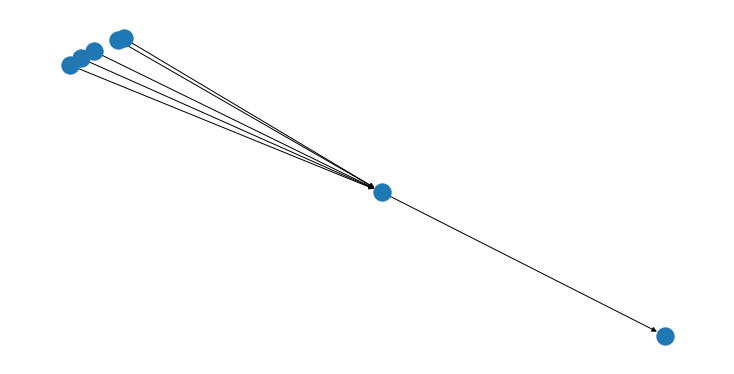

In [ ]:
nx.draw_kamada_kawai(g1)

In [ ]:
camada entrada = [1,2,3,4]
neuronios = [1,2,3,4][1,2,3,4][1,2,3,4]
ativacao = relu(neuronios)
output = ativacao

erro = grad(neuronios)


In [ ]:
g2 = nx.DiGraph()
"""
# X
for i in range(1,5):
  g2.add_node(i)

# y
g2.add_node('out')

# Neurons
for j in ('n1','n2','n3'):
  g2.add_node(j)
"""
# Conexões
for i in range(1,5):
  for j in ('n1','n2','n3'):
    g2.add_edge(i,j)
    g2.add_edge(j,'out')
B = nx.nx_agraph.to_agraph(g2)
B.draw("g2.png", prog="dot")

In [ ]:
g3 = g2.reverse()
C = nx.nx_agraph.to_agraph(g3)
C.draw("g3.png", prog="dot")

In [ ]:
g4 = nx.DiGraph()
# Conexões
for i in range(1,5):
  for j in ('n11','n12','n13'):
    g4.add_edge(i,j)
    for k in ('n21','n22','n23', 'n24', 'n25'):
      g4.add_edge(j,k)
      for l in ('n31','n32','n33', 'n34', 'n35', 'n36', 'n37'):
        g4.add_edge(k,l)
        g4.add_edge(l,'out')
D = nx.nx_agraph.to_agraph(g4)
D.draw("g4.png", prog="dot")

### Normalization

In [ ]:
X_train_d1_norm = X_train_d1.sub(X_train_d1.mean()).div(X_train_d1.std())
X_test_d1_norm = X_test_d1.sub(X_train_d1.mean()).div(X_train_d1.std())

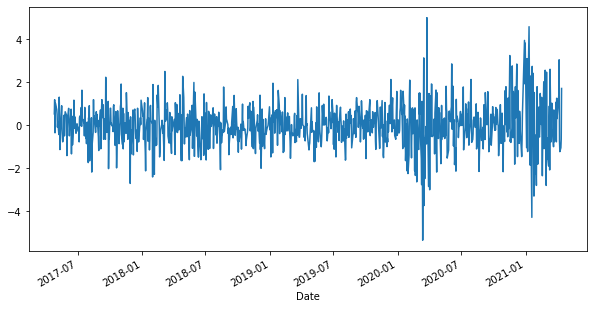

In [ ]:
X_train_d1_norm['Adj Close-1'].plot()

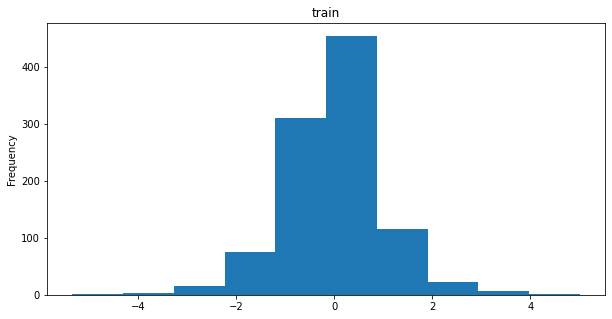

In [ ]:
X_train_d1_norm['Adj Close-1'].plot.hist(title='train')

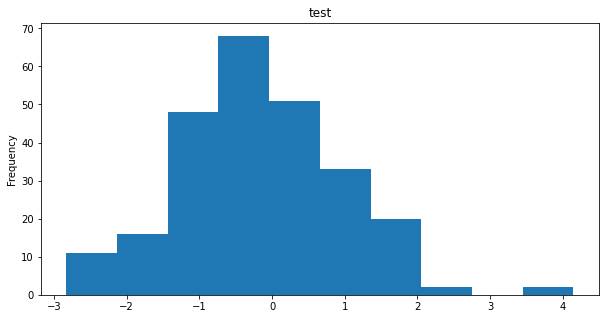

In [ ]:
X_test_d1_norm['Adj Close-1'].plot.hist(title='test')

### Tensors

![](https://miro.medium.com/max/654/1*8jdzMrA33Leu3j3F6A8a3w.png)

#### Batches

In [ ]:
training_data = torch.tensor(pd.concat([X_train_d1_norm, y_train_d1], axis=1).values)
testing_data = torch.tensor(pd.concat([X_test_d1_norm, y_test_d1], axis=1).values)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=False)
test_dataloader = DataLoader(testing_data, batch_size=16, shuffle=False)

### ANN

In [ ]:
class OP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(7,1)
    
  def forward(self, X):
    out = torch.relu(self.fc(X))
    return out

In [ ]:
one_neuron = OP()
print(one_neuron(torch.tensor(X_train_d1.iloc[0]).float()))
print(y_train_d1.iloc[0])

tensor([0.], grad_fn=<ReluBackward0>)
27.1572265625


In [ ]:
one_neuron = OP()
epochs = 50
loss_fn = nn.MSELoss()
optimizer = optim.SGD(one_neuron.parameters(), lr=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch1, loss 481.0567878844246
Epoch2, loss 479.70575362916975
Epoch3, loss 478.24449412027997
Epoch4, loss 477.13922542995874
Epoch5, loss 476.2566898890904
Epoch6, loss 475.54496232290114
Epoch7, loss 474.969111487979
Epoch8, loss 474.5033505152142
Epoch9, loss 474.1263041420588
Epoch10, loss 473.8192308213976
Epoch11, loss 473.56562671964133
Epoch12, loss 473.35308135501924
Epoch13, loss 473.1743895515563
Epoch14, loss 473.02565402076357
Epoch15, loss 472.89960128541975
Epoch16, loss 472.7925800141834
Epoch17, loss 472.7019750201513
Epoch18, loss 472.6235789949932
Epoch19, loss 472.55550977918836
Epoch20, loss 472.49633050343346
Epoch21, loss 472.4452331785172
Epoch22, loss 472.4000984070793
Epoch23, loss 472.3603751772926
Epoch24, loss 472.32577732631137
Epoch25, loss 472.296009729779
Epoch26, loss 472.2694876534598
Epoch27, loss 472.24459693545384
Epoch28, loss 472.2228824676029
Epoch29, loss 472.20210907951235
Epoch30, loss 472.18195669991627
Epoch31, loss 472.16216932024275
Epoc

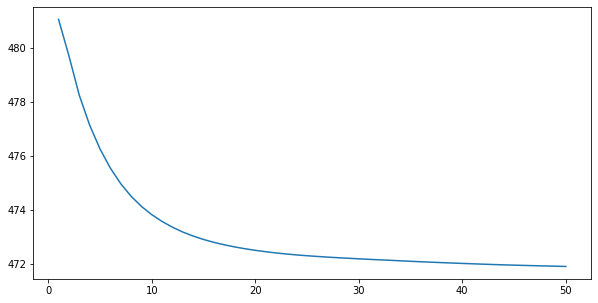

In [ ]:
history = {}
for epoch in range(1, epochs+1):
  loss_train = 0.0
  for train_data in train_dataloader:
    x = train_data[:,:7].float()
    y = train_data[:,7].float()
  
    #forward pass
    outputs = one_neuron(x)

    #loss measure
    loss = loss_fn(outputs,y)

    #backward pass
    optimizer.zero_grad() # pára o autograd
    loss.backward() # executa o backpropagation
    optimizer.step() # atualiza os pesos

    loss_train += loss.item() # soma os erros para obter o erro total

  print('Epoch{}, loss {}'.format(epoch, loss_train / len(train_dataloader))) # apresenta o erro médio da época
  history[epoch] = loss_train / len(train_dataloader)

pd.Series(history).plot()



In [ ]:
one_neuron.eval() #desliga o treinamento do modelo
results = []
for test_data in test_dataloader:
    x = test_data[:,:7].float()
    y = test_data[:,7].float()
    
    y_pred = one_neuron(x)
    results.extend(y_pred.flatten().detach().numpy())
#pd.DataFrame(results).plot()
results[:10]

[0.0, 0.0, 0.0, 0.006098807, 0.0, 0.0, 0.0, 1.4480712, 0.0, 1.3532414]

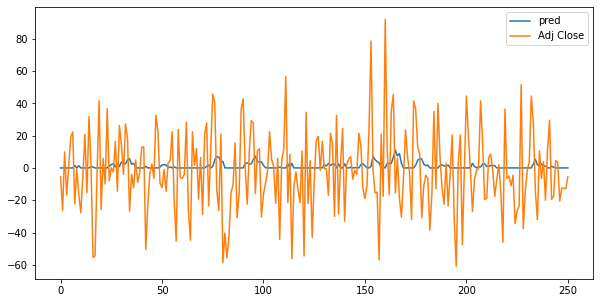

In [ ]:
pd.concat([pd.Series(results, name='pred'), y_test_d1.reset_index(drop=True)],axis=1).plot()

In [ ]:
print('Prices - OP Results')
print('r2' ,r2_score(results, y_test_d1))
print('mse' ,mean_squared_error(results, y_test_d1))
print('mae', mean_absolute_error(results, y_test_d1))
resultsprices['OP'] = {'r2':r2_score(results, y_test_d1), \
                 'mse': mean_squared_error(results, y_test_d1), 
                 'mae': mean_absolute_error(results, y_test_d1)}

Prices - OP Results
r2 -187.2816446022491
mse 628.265283711631
mae 19.57882738707075


In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(7,100)
    self.fc3 = nn.Linear(100,1)
    #self.drop1 = nn.Dropout(p=0.5)
    #self.fc2 = nn.Linear(64,32)
    #self.drop2 = nn.Dropout(p=0.5)
  
  def forward(self, X):
    out = torch.tanh(self.fc1(X))
    #out = self.drop1(out)
    #out = torch.relu(self.fc2(out))
    #out = self.drop2(out)
    out = self.fc3(out)
    return out

In [ ]:
multi_neuron = MLP()
print(multi_neuron(torch.tensor(X_train_d1.iloc[0]).float()))
print(y_train_d1.iloc[0])

tensor([-0.6459], grad_fn=<AddBackward0>)
27.1572265625


In [ ]:
multi_neuron = MLP()
epochs = 1000
loss_fn = nn.MSELoss()
#optimizer = optim.RMSprop(multi_neuron.parameters(), lr=0.001)
optimizer = optim.SGD(multi_neuron.parameters(), lr=0.01, weight_decay= 0.005)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch10, loss 472.1953005109514
Epoch20, loss 469.98317173549106
Epoch30, loss 468.27874380444723
Epoch40, loss 467.10897391183033
Epoch50, loss 466.0652768574064
Epoch60, loss 464.9838499038938
Epoch70, loss 464.10504671127075
Epoch80, loss 463.339724465022
Epoch90, loss 462.66132100423175
Epoch100, loss 461.9160196213495
Epoch110, loss 461.268919081915
Epoch120, loss 460.6972982013036
Epoch130, loss 460.1857552906824
Epoch140, loss 459.80941724020335
Epoch150, loss 459.4679807632688
Epoch160, loss 459.08869122701975
Epoch170, loss 458.7442687503875
Epoch180, loss 458.4001179044209
Epoch190, loss 458.0741125439841
Epoch200, loss 457.79850320967415
Epoch210, loss 457.5490692380875
Epoch220, loss 457.2989738101051
Epoch230, loss 457.08313920762805
Epoch240, loss 456.88528018527563
Epoch250, loss 456.6995571075924
Epoch260, loss 456.47628723628935
Epoch270, loss 456.2558312794519
Epoch280, loss 456.08224087669737
Epoch290, loss 455.90626646980405
Epoch300, loss 455.7371903676835
Epoch310

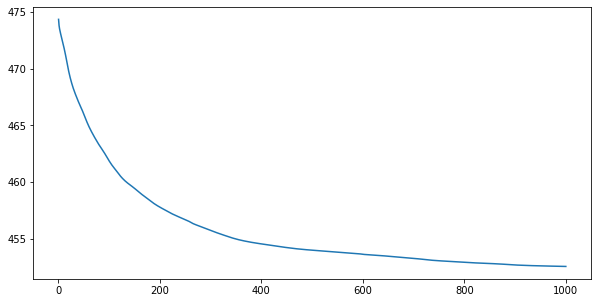

In [ ]:
history = {}
for epoch in range(1, epochs+1):
  loss_train = 0.0
  for train_data in train_dataloader:
    x = train_data[:,:7].float()
    y = train_data[:,7].float()
  
    #forward pass
    outputs = multi_neuron(x)

    #loss measure
    loss = loss_fn(outputs,y)

    #backward pass
    optimizer.zero_grad() # pára o autograd
    loss.backward() # executa o backpropagation
    optimizer.step() # atualiza os pesos

    loss_train += loss.item() # soma os erros para obter o erro total

  if (epoch % 10 == 0):
    print('Epoch{}, loss {}'.format(epoch, loss_train / len(train_dataloader))) # apresenta o erro médio da época
  history[epoch] = loss_train / len(train_dataloader)

pd.Series(history).plot()



In [ ]:
multi_neuron.eval()
results = []
for test_data in test_dataloader:
    x = test_data[:,:7].float()
    y = test_data[:,7].float()
    
    y_pred = multi_neuron(x)
    results.extend(y_pred.flatten().detach().numpy())
#pd.DataFrame(results).plot()
results[:10]

[1.2869357,
 -0.5590868,
 3.8070354,
 3.2451992,
 1.5999026,
 7.0172415,
 -0.019789696,
 -1.6551976,
 -0.81843805,
 1.5772028]

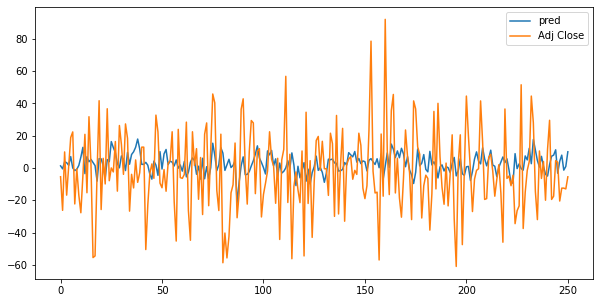

In [ ]:
pd.concat([pd.Series(results, name='pred'), y_test_d1.reset_index(drop=True)],axis=1).plot()

In [ ]:
print('Prices - MLP Results')
print('r2' ,r2_score(results, y_test_d1))
print('mse' ,mean_squared_error(results, y_test_d1))
print('mae', mean_absolute_error(results, y_test_d1))
resultsprices['MLP'] = {'r2':r2_score(results, y_test_d1), \
                 'mse': mean_squared_error(results, y_test_d1), 
                 'mae': mean_absolute_error(results, y_test_d1)}

Prices - MLP Results
r2 -18.380914172545666
mse 646.2218204617874
mae 19.993785931294656


In [ ]:
pd.DataFrame(resultsprices)

,KNN,KNN D1 ONE,SVR,SVR multi,OP,MLP
r2,0.709601,0.949576,0.963272,0.362795,-187.281645,-18.380914
mse,4210.650043,854.755165,613.071919,9065.061797,628.265284,646.221820
mae,52.807032,22.534679,19.234204,77.197644,19.578827,19.993786


Redes recorrentes:
* LSTM: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM
* GRU: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html#torch.nn.GRU
